In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

In [3]:
df = pd.read_csv('clean_sales.csv')

In [5]:
df.transaction_date = pd.to_datetime(df.transaction_date)

In [13]:
df = df.groupby(df.transaction_date)['line_item_amount'].sum()

In [16]:
df = df.reset_index()

In [17]:
df

,transaction_date,line_item_amount
0,2019-04-01,7462.00
1,2019-04-02,7269.10
2,2019-04-03,7461.25
3,2019-04-04,7086.45
4,2019-04-05,7236.25
5,2019-04-06,6513.75
6,2019-04-07,7693.73
7,2019-04-08,8837.54
8,2019-04-09,8355.48
9,2019-04-10,8210.48


## Split 

In [18]:
train = df[df.transaction_date < '2019-04-22']

In [19]:
test = df[df.transaction_date >= '2019-04-22']

In [20]:
train

,transaction_date,line_item_amount
0,2019-04-01,7462.00
1,2019-04-02,7269.10
2,2019-04-03,7461.25
3,2019-04-04,7086.45
4,2019-04-05,7236.25
5,2019-04-06,6513.75
6,2019-04-07,7693.73
7,2019-04-08,8837.54
8,2019-04-09,8355.48
9,2019-04-10,8210.48


In [21]:
test

,transaction_date,line_item_amount
21,2019-04-22,8211.76
22,2019-04-23,8217.49
23,2019-04-24,8819.70
24,2019-04-25,8340.85
25,2019-04-26,8396.43
26,2019-04-27,8744.08
27,2019-04-28,6748.15
28,2019-04-29,6442.40


## Baseline last observed value

In [50]:
last_observed = train['line_item_amount'][-1:].values[0]


In [51]:
last_observed 

8360.96

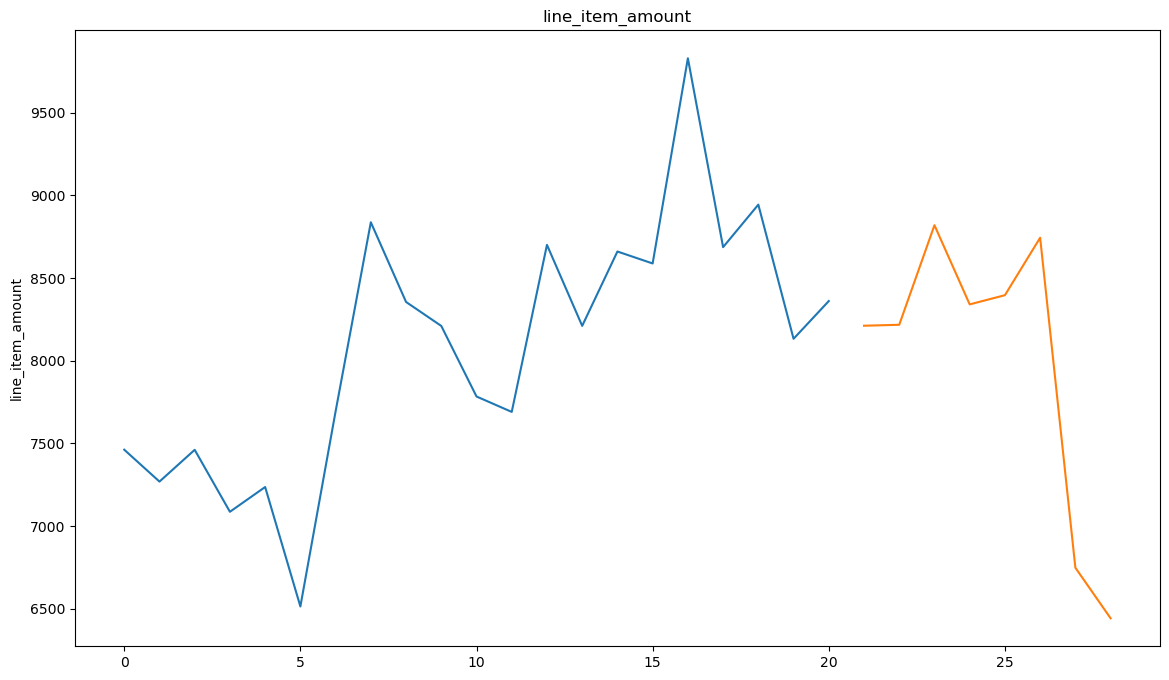

In [55]:
plt.figure(figsize=(14,8))
plt.plot(train['line_item_amount'])
plt.plot(test['line_item_amount'])
plt.ylabel('line_item_amount')
plt.title('line_item_amount')
plt.show()

In [62]:
yhat_df = pd.DataFrame(
    {'line_item_amount': [last_observed]},
    index=test.index)

yhat_df

,line_item_amount
21,8360.96
22,8360.96
23,8360.96
24,8360.96
25,8360.96
26,8360.96
27,8360.96
28,8360.96


In [63]:
yhat_df.describe()

,line_item_amount
count,8.00
mean,8360.96
std,0.00
min,8360.96
25%,8360.96
50%,8360.96
75%,8360.96
max,8360.96


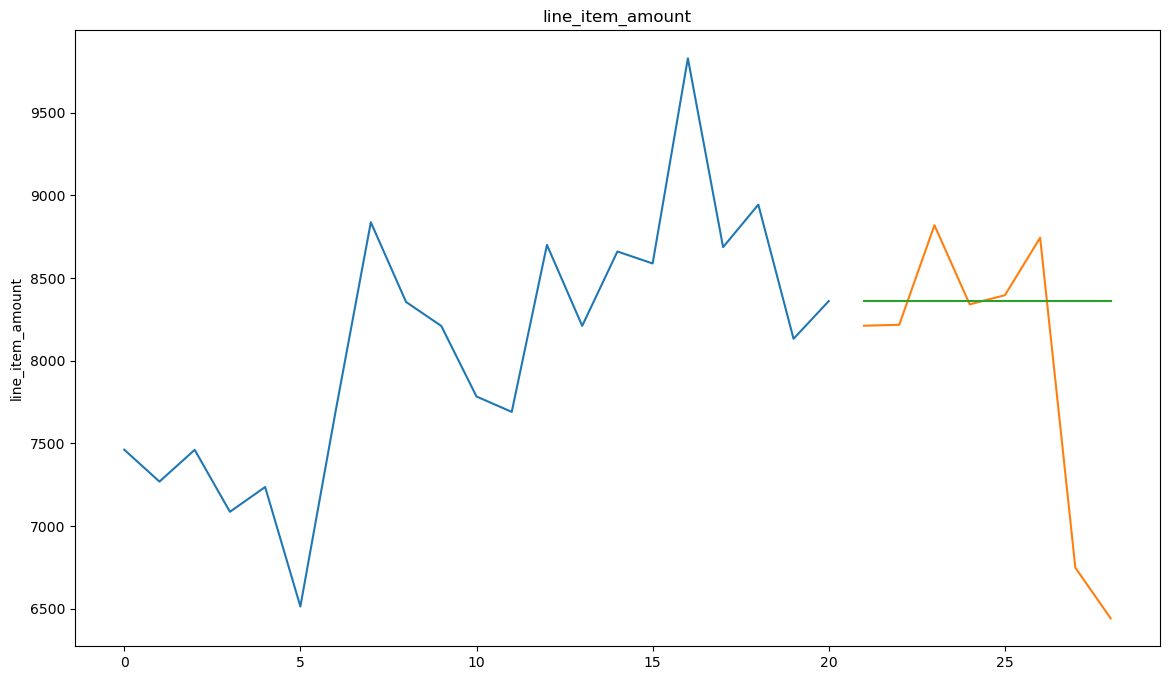

In [64]:
plt.figure(figsize=(14,8))
plt.plot(train['line_item_amount'])
plt.plot(test['line_item_amount'])
plt.plot(yhat_df.line_item_amount)
plt.ylabel('line_item_amount')
plt.title('line_item_amount')
plt.show()

In [65]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse

In [68]:
evaluate('line_item_amount')

914.0

In [69]:
col = 'line_item_amount' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [70]:
# fit the holt's object
model = model.fit(optimized=True)

In [71]:
yhat_items = model.predict(start = test.index[0],
                              end = test.index[-1])

In [72]:
yhat_df[col] = round(yhat_items, 2)

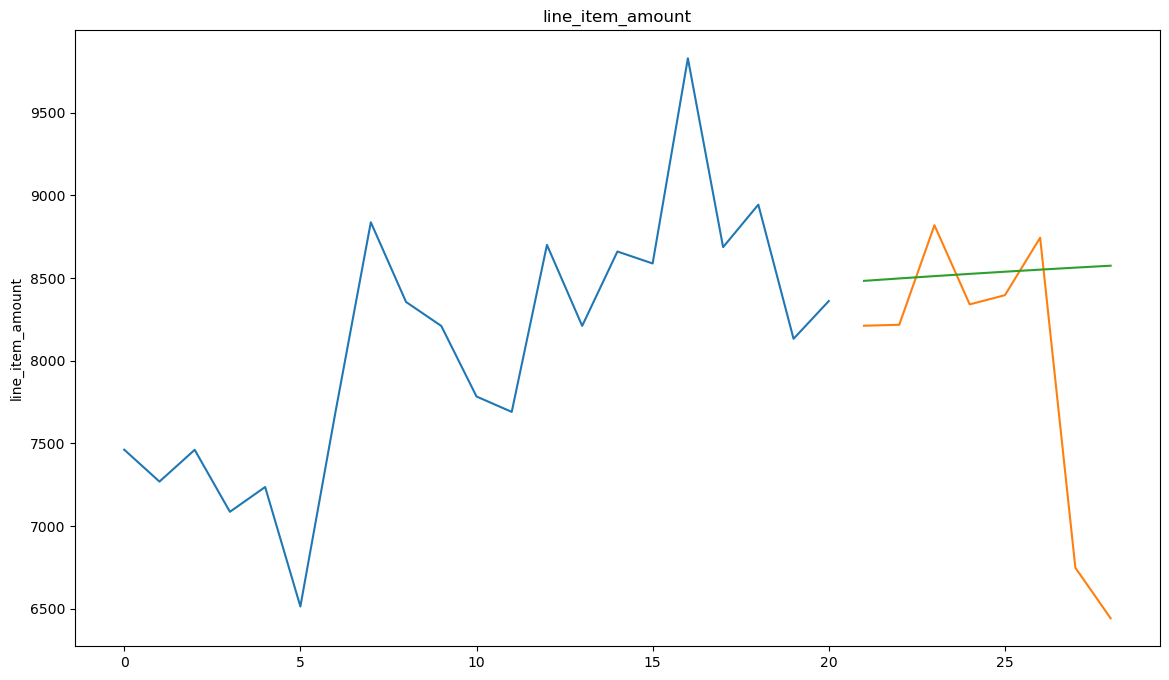

In [73]:
plt.figure(figsize=(14,8))
plt.plot(train['line_item_amount'])
plt.plot(test['line_item_amount'])
plt.plot(yhat_df.line_item_amount)
plt.ylabel('line_item_amount')
plt.title('line_item_amount')
plt.show()

In [74]:
evaluate('line_item_amount')

1011.0

- Failed to beat baseline. Not enongh data for time series analysis